In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Each line of code is a import from Python libraries for data science and visulation.
Line 1: Imports the NumPy library, which provides support for large multidimsenional arrays and matrices, used for numerical operations
Line 2: Imports the pandas library, crucial for data manipulation and analysis through its dataframe structure
Line 3: Imports the matplotlib used for creating visualizations(graphs,charts)
Line 4: Imports Seaborn, which is a library used for statistical data visualization based on Matplotlib.

In [2]:
finance_df = pd.read_csv('/content/finance_data.csv')
display(finance_df.head())

,year,quarter,company_id,sector,revenue,profit_margin,profit,stock_price,pe_ratio,debt_to_equity,dividend_yield,market_cap
0,2000,1,Company_1,Finance,2.198686e+08,0.04,9755484.56,36.15,3.71,1.42,0.01,2.363830e+09
1,2000,1,Company_2,Consumer Goods,3.298028e+08,0.06,18814148.79,54.22,2.88,1.71,0.01,3.956767e+09
2,2000,1,Company_3,Finance,4.397371e+08,0.07,30660094.32,72.29,2.36,1.66,0.03,3.633502e+09
3,2000,1,Company_4,Energy,5.496714e+08,0.08,45293321.16,90.37,2.00,1.07,0.05,3.833839e+09
4,2000,1,Company_5,Manufacturing,6.596057e+08,0.10,62713829.30,108.44,1.73,1.36,0.02,6.178690e+09


In [ ]:
# This code displays the number of rows, columns, and cells in the dataset.
size = finance_df.size

shape = finance_df.shape

print("Size = {}\nShape = {}".format(size, shape))
print('Rows: ', finance_df.shape[0])
print('Cols: ', finance_df.shape[1])

Size = 30000
Shape = (2500, 12)
Rows:  2500
Cols:  12


In [ ]:
# Basic statistics
print("\nBasic Statistics:")
print(finance_df.describe())


Basic Statistics:
              year      quarter       revenue  profit_margin        profit  \
count  2500.000000  2500.000000  2.500000e+03    2500.000000  2.500000e+03   
mean   2012.000000     2.500000  2.658120e+09       0.373936  1.199423e+09   
std       7.212545     1.118258  1.624470e+09       0.221228  1.129004e+09   
min    2000.000000     1.000000  1.727128e+08       0.030000  7.817187e+06   
25%    2006.000000     1.750000  1.329516e+09       0.200000  2.821963e+08   
50%    2012.000000     2.500000  2.409744e+09       0.340000  8.637113e+08   
75%    2018.000000     3.250000  3.729541e+09       0.510000  1.803392e+09   
max    2024.000000     4.000000  8.114111e+09       1.330000  6.382023e+09   

       stock_price     pe_ratio  debt_to_equity  dividend_yield    market_cap  
count  2500.000000  2500.000000     2379.000000     2500.000000  2.500000e+03  
mean    465.459628     0.741324        1.193817        0.020316  2.526694e+10  
std     283.374544     0.632146       

In [ ]:
# Counts of missing values
print("\nMissing Values Count:")
print(finance_df.isnull().sum())


Missing Values Count:
year                0
quarter             0
company_id          0
sector              0
revenue             0
profit_margin       0
profit              0
stock_price         0
pe_ratio            0
debt_to_equity    121
dividend_yield      0
market_cap          0
dtype: int64


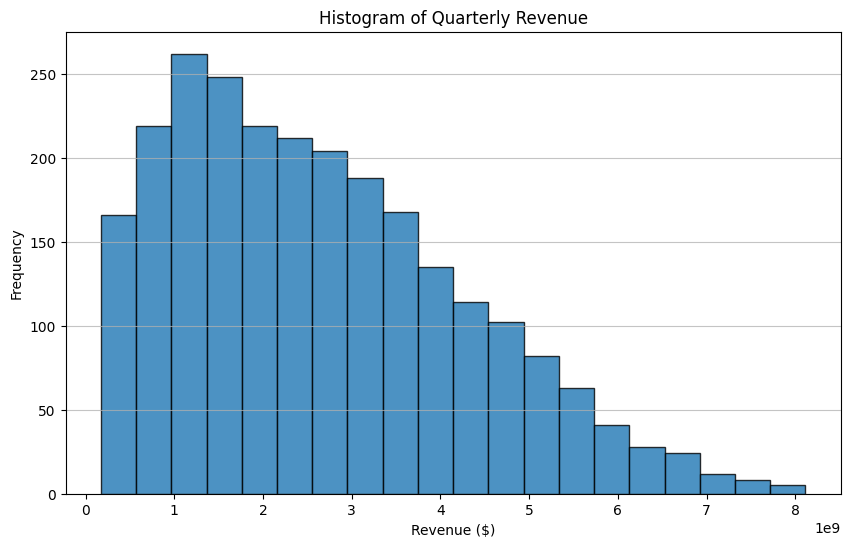

In [ ]:
# Histogram of revenue data
plt.figure(figsize=(10, 6))
plt.hist(finance_df['revenue'], bins=20, edgecolor='black', alpha=0.8)
plt.title('Histogram of Quarterly Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))  # Use scientific notation for large numbers
plt.savefig('revenue_histogram.png')
plt.show()

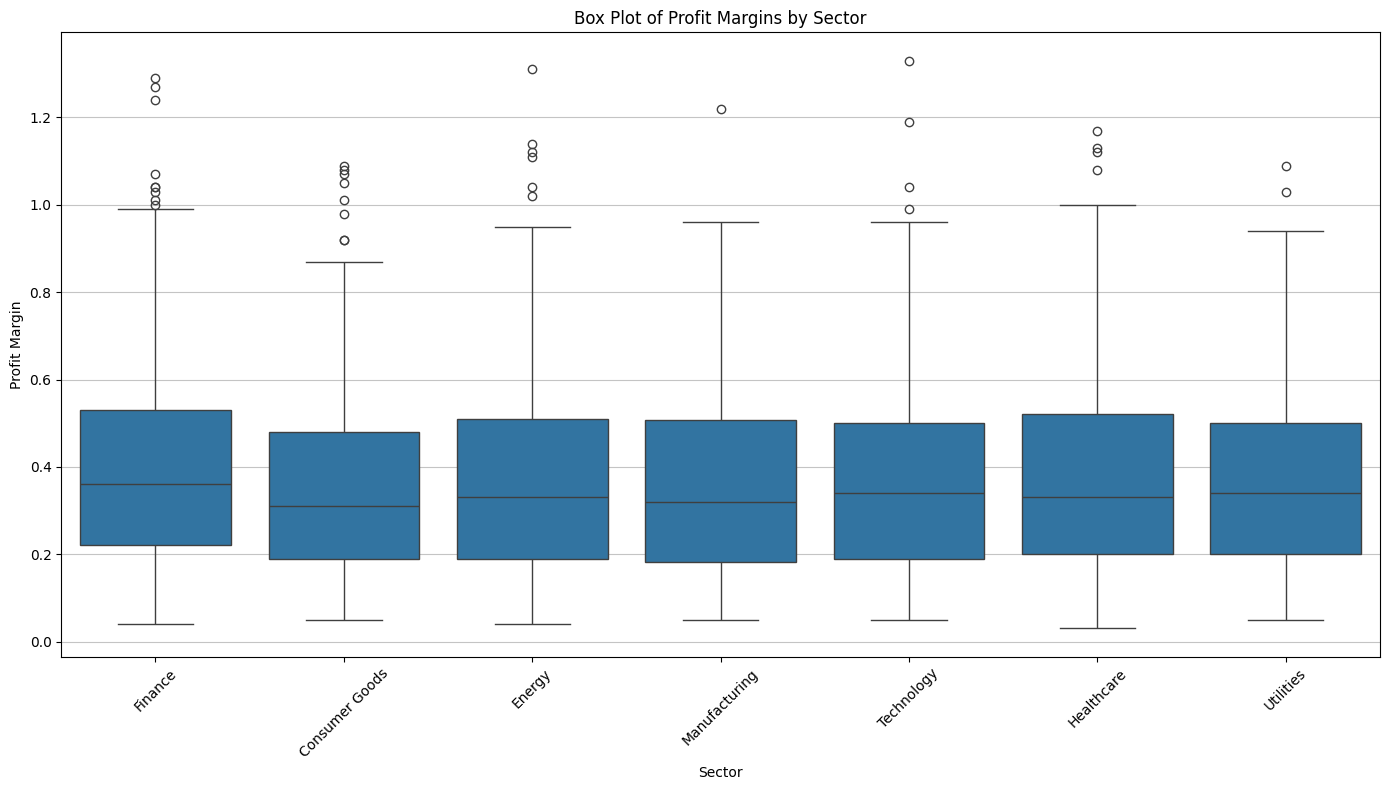

In [ ]:
# Box plot by company and sector
plt.figure(figsize=(14, 8))
sns.boxplot(x='sector', y='profit_margin', data=finance_df)
plt.title('Box Plot of Profit Margins by Sector')
plt.xlabel('Sector')
plt.ylabel('Profit Margin')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.savefig('profit_margin_boxplot.png')
plt.show()

In [ ]:
# Identifying outliers in P/E ratio using Z-score
z_scores = np.abs((finance_df['pe_ratio'] - finance_df['pe_ratio'].mean()) / finance_df['pe_ratio'].std())
outliers = finance_df[z_scores > 3]

print("\nOutliers in P/E Ratio (Z-score > 3):")
print(outliers[['year', 'quarter', 'company_id', 'sector', 'pe_ratio', 'profit_margin']])


Outliers in P/E Ratio (Z-score > 3):
      year  quarter company_id          sector  pe_ratio  profit_margin
0     2000        1  Company_1         Finance      3.71           0.04
1     2000        1  Company_2  Consumer Goods      2.88           0.06
25    2000        2  Company_1      Healthcare      2.64           0.07
225   2002        2  Company_1      Technology      2.91           0.09
250   2002        3  Company_1      Healthcare      6.26           0.03
251   2002        3  Company_2          Energy      4.87           0.04
252   2002        3  Company_3      Technology      3.98           0.05
253   2002        3  Company_4      Technology      3.37           0.06
254   2002        3  Company_5      Technology      2.92           0.07
350   2003        3  Company_1         Finance      2.79           0.09
425   2004        2  Company_1         Finance      2.64           0.06
575   2005        4  Company_1         Finance      3.31           0.05
650   2006        3  Compa

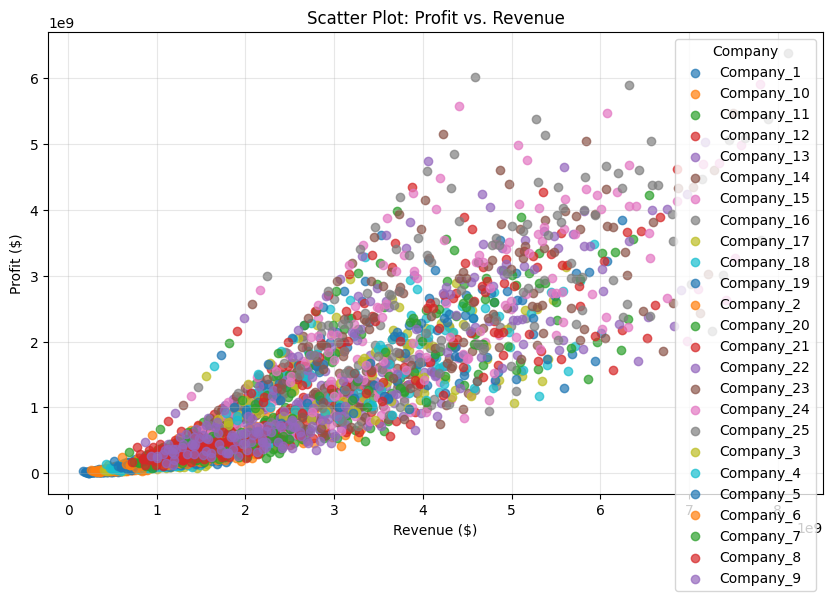

In [ ]:
# Scatter plot of profit vs. revenue
plt.figure(figsize=(10, 6))
for company, group in finance_df.groupby('company_id'):
    plt.scatter(group['revenue'], group['profit'], label=company, alpha=0.7)

plt.title('Scatter Plot: Profit vs. Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Profit ($)')
plt.legend(title='Company')
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))  # Scientific notation for large numbers
plt.savefig('profit_revenue_scatter.png')
plt.show()

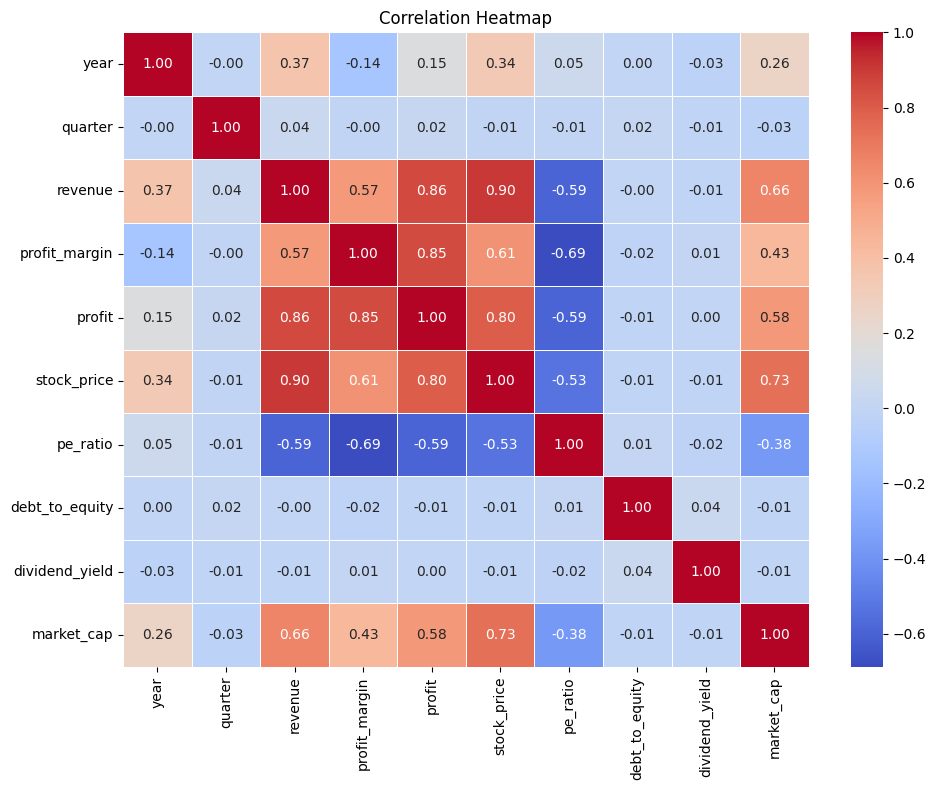

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = finance_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()
